In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt  # For Evaluting the trained Model  
from sklearn.feature_extraction.text import TfidfVectorizer # To Implement TF-IDF
import joblib #loding and sving the model
from sklearn.svm import LinearSVC
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [2]:

t_text = pd.read_csv('True.csv')
f_text = pd.read_csv('Fake.csv')

In [3]:
t_text['label'] = 1  # 1 for true news
f_text['label'] = 0  # 0 for false news

In [4]:
data_merge = pd.concat([t_text, f_text], axis = 0)

In [5]:
data_merge.tail(2)

,title,text,subject,date,label
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [6]:
(data_merge.head(2))


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17,1


In [7]:
data_merge.columns


Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [8]:
Data =  data_merge.drop(['title','subject','date'],axis = 1)

In [9]:
Data.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [10]:
Data.tail()

,text,label
23476,21st Century Wire says As 21WIRE reported earl...,0
23477,21st Century Wire says It s a familiar theme. ...,0
23478,Patrick Henningsen 21st Century WireRemember ...,0
23479,21st Century Wire says Al Jazeera America will...,0
23480,21st Century Wire says As 21WIRE predicted in ...,0


In [11]:
shuffled_data = Data.sample(frac=1).reset_index(drop=True)
shuffled_data

,text,label
0,The Left s suppression of speech and viewpoint...,0
1,21st Century Wire says The leftist media machi...,0
2,WASHINGTON (Reuters) - President Barack Obama ...,1
3,,0
4,WASHINGTON/NEW YORK (Reuters) - The U.S. House...,1
...,...,...
44893,"As the Deseret News said on Saturday, they hav...",0
44894,Fox host Chris Wallace pinned bigoted North Ca...,0
44895,NEW YORK (Reuters) - Democrat Hillary Clinton ...,1
44896,Shame on Teen Vogue! Maxine Waters was a guest...,0


In [12]:
new_df = shuffled_data.copy()


In [13]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)


In [14]:

def transform(text):
    text = text.lower()  # Convert text to lowercase
    tokens = word_tokenize(text)  # Tokenize the text
    # Lemmatize, remove stopwords and punctuation
    tokens = [lemmatizer.lemmatize(word, "v") for word in tokens if word not in stop_words and word not in punctuations]
    return " ".join(tokens)


In [15]:
new_df["text"] = new_df["text"].apply(transform)
new_df["text"]

0        leave suppression speech viewpoints conservati...
1        21st century wire say leftist media machine wa...
2        washington reuters president barack obama inte...
3                                                         
4        washington/new york reuters u.s. house represe...
                               ...                        
44893    deseret news say saturday endorse candidate 80...
44894    fox host chris wallace pin bigoted north carol...
44895    new york reuters democrat hillary clinton 5 pe...
44896    shame teen vogue maxine water guest teen vogue...
44897                                                     
Name: text, Length: 44898, dtype: object

In [16]:
# Split data into training + validation and test sets
X_temp, X_test, y_temp, y_test = train_test_split(new_df['text'], new_df['label'], test_size=0.2, random_state= 3)


In [17]:
# Split training + validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=3)

In [18]:
f"Training set size: {len(X_train)}"

'Training set size: 28734'

In [19]:
f"Validation set size: {len(X_val)}"

'Validation set size: 7184'

In [20]:
f"Test set size: {len(X_test)}"

'Test set size: 8980'

In [21]:
tfidf = TfidfVectorizer()

In [22]:
tfidf.fit(X_train)

TfidfVectorizer()

In [23]:
X_train_tfidf = tfidf.transform(X_train)

In [24]:
X_val_tfidf = tfidf.transform(X_val)

In [25]:
X_test_tfidf = tfidf.transform(X_test)

In [26]:
tfidf.vocabulary_

{'reason': 69628,
 'people': 64259,
 'like': 50436,
 'donald': 27160,
 'trump': 85152,
 'ardent': 10311,
 'fan': 31561,
 'handle': 38090,
 'problems': 67061,
 'without': 91320,
 'make': 52398,
 'threats': 83364,
 'sean': 74884,
 'hannity': 38168,
 'publicly': 67717,
 'threaten': 83359,
 'someone': 78189,
 'tweet': 85762,
 'talk': 81721,
 'lawyers': 49454,
 'libel': 50223,
 'slander': 77439,
 'defamation': 24734,
 'tortious': 84279,
 'interference': 43106,
 'allege': 8559,
 'journalist': 45477,
 'really': 69569,
 'ought': 62360,
 'know': 47774,
 'word': 91590,
 'mean': 54239,
 'throw': 83404,
 'around': 10526,
 'he': 38725,
 'also': 8758,
 'quite': 68555,
 'bite': 14338,
 'posture': 66273,
 'include': 42138,
 'issue': 43822,
 'threat': 83357,
 'oh': 61343,
 'fyi': 34378,
 'whoever': 90809,
 'remember': 70510,
 'ip': 43464,
 'address': 7205,
 'traceable': 84454,
 'get': 35363,
 'ready': 69495,
 'seanhannity': 74891,
 'may': 53764,
 '2017many': 2742,
 'assume': 10990,
 'refer': 70056,
 's

In [27]:
#Model  
#Model Supper Vector Machine SVM
Model = LinearSVC(C=1.0, max_iter=1000, tol=1e-4)
Model.fit(X_train_tfidf, y_train)

LinearSVC()

THE CODE FOR EVALUTING THE TRAINED MODEL

accuracy:0.9961
precision:0.9950
recall:0.9968
f1:0.9959


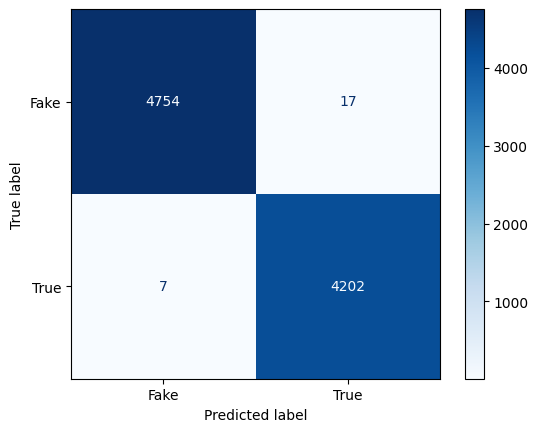

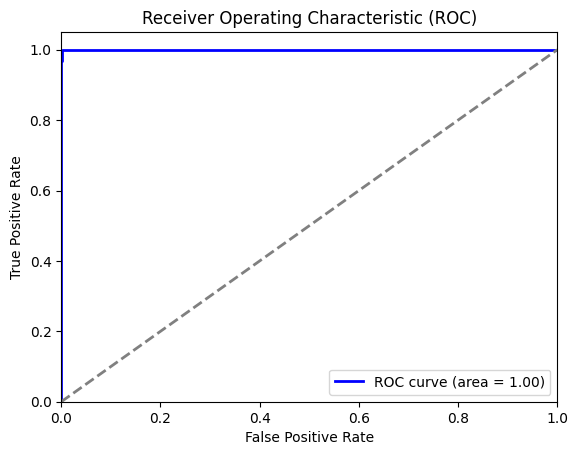

In [29]:
y_val_pred = Model.predict(X_val_tfidf)

                        #EValuting the metrics 
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f"accuracy:{accuracy:.4f}")
print(f"precision:{precision:.4f}")
print(f"recall:{recall:.4f}")
print(f"f1:{f1:.4f}")

                #Predict probabilities for the positive class
y_test_pred_proba = Model.decision_function(X_test_tfidf)

                  #Predict the class labels based on a default threshold (0.5)
y_test_pred = Model.predict(X_test_tfidf)

                  #Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'True'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

               #ROC Curve and Calculate AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
auc_score = roc_auc_score(y_test, y_test_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()




In [ ]:
# Save the trained model to a file
joblib.dump(Model, 'SVC_model.pkl')


In [ ]:
# Load the model from the file
Model = joblib.load('SVC_model.pkl')

TO SAVE THE VECTORIZER FILE

In [ ]:
# Save the vectorizer to a file
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

In [ ]:
# Load the vectorizer from the file
tfidf = joblib.load('tfidf_vectorizer.pkl')